# Final Project
In this project, our aim is to building a model for predicting dimond prices. Our label (output) will be price column. Do not forget, this is a Classification problem!

## Content
carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

## Steps
* Read the diamonds.csv file and describe it.
* Make at least 4 different analysis on Exploratory Data Analysis section.
* Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
* Define appropriate evaluation metric for our case (classification). Hint: Is there any imbalanced problem in the label column?
* Split the dataset into train and test set. (Consider the imbalanced problem if is there any). Check the distribution of labels in the subsets (train and test).
* Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
* Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
* Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
* Analyse and compare results of 3 algorithms.
* Select best performing model based on evaluation metric you chose on test dataset.

## **Mustafa Sevim**

# Data

In [107]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [108]:
data_1 = pd.read_csv("/content/diamonds.csv")

In [109]:
data_1.head(20)

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
5,6,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,Very Low
6,7,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,2.47,Very Low
7,8,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53,Very Low
8,9,0.22,Fair,E,VS2,65.1,61.0,3.87,3.78,2.49,Very Low
9,10,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39,Very Low


In [110]:
data_2 = data_1.drop(['index'], axis = 1)
data_2.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low


In [111]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  object 
dtypes: float64(6), object(4)
memory usage: 4.1+ MB


In [112]:
data_2.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [113]:
data_2.duplicated().sum()

342

In [114]:
data_2.describe()

,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [115]:
# depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
xyz = 2*data_2["z"] / (data_2["x"] + data_2["y"])
data_3 = data_2.drop(["x"], axis=1)
data_4 = data_3.drop(["y"], axis=1)
data = data_4.drop(["z"], axis=1)
data["xyz"] = xyz
data.head()

,carat,cut,color,clarity,depth,table,price,xyz
0,0.23,Ideal,E,SI2,61.5,55.0,Very Low,0.612863
1,0.21,Premium,E,SI1,59.8,61.0,Very Low,0.597671
2,0.23,Good,E,VS1,56.9,65.0,Very Low,0.568966
3,0.29,Premium,I,VS2,62.4,58.0,Very Low,0.623962
4,0.31,Good,J,SI2,63.3,58.0,Very Low,0.632911


In [116]:
data.groupby(by="price").count()

,carat,cut,color,clarity,depth,table,xyz
price,,,,,,,
High,2308,2308,2308,2308,2308,2308,2307
Low,11271,11271,11271,11271,11271,11271,11269
Medium,4109,4109,4109,4109,4109,4109,4109
Very High,1589,1589,1589,1589,1589,1589,1587
Very Low,34663,34663,34663,34663,34663,34663,34661


In [117]:
data.price.value_counts()

Very Low     34663
Low          11271
Medium        4109
High          2308
Very High     1589
Name: price, dtype: int64

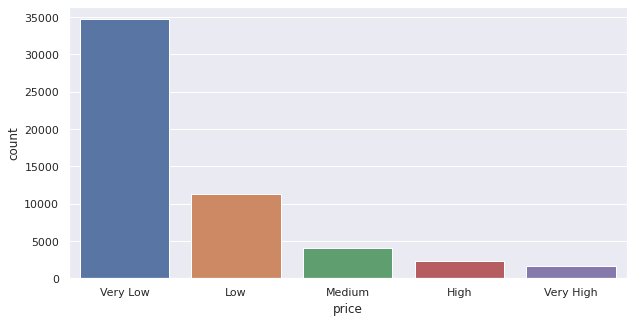

In [118]:
sns.countplot(x="price", data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


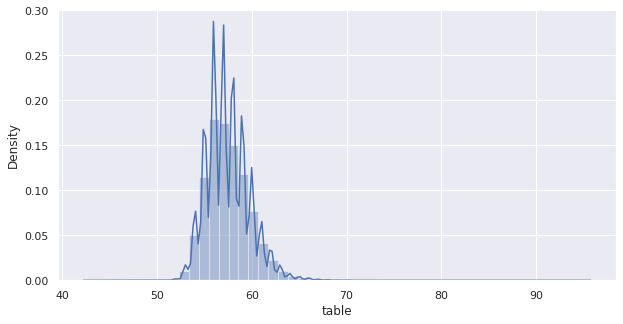

In [119]:
sns.distplot(data["table"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


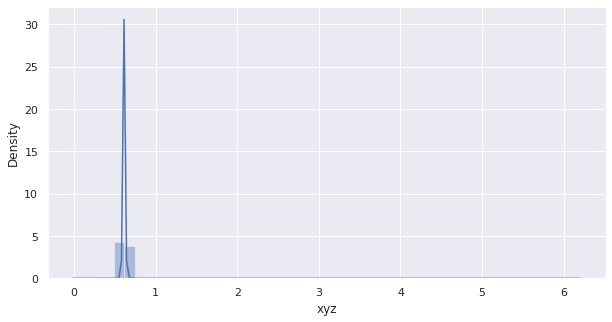

In [120]:
sns.distplot(data["xyz"])

In [121]:
data.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [122]:
data['cut'] = data['cut'].replace({1: 'Fair', 2: 'Good', 3: 'Very Good', 4: 'Premium', 5: 'Ideal'})
data = pd.get_dummies(data, columns = ['cut'])
data.head()

,carat,color,clarity,depth,table,price,xyz,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,E,SI2,61.5,55.0,Very Low,0.612863,0,0,1,0,0
1,0.21,E,SI1,59.8,61.0,Very Low,0.597671,0,0,0,1,0
2,0.23,E,VS1,56.9,65.0,Very Low,0.568966,0,1,0,0,0
3,0.29,I,VS2,62.4,58.0,Very Low,0.623962,0,0,0,1,0
4,0.31,J,SI2,63.3,58.0,Very Low,0.632911,0,1,0,0,0


In [123]:
data.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [124]:
data['color'] = data['color'].replace({1: 'G', 2: 'E', 3: 'F', 4: 'H', 5: 'D', 6: 'I', 7: 'J'})
data = pd.get_dummies(data, columns = ['color'])
data.head()

,carat,clarity,depth,table,price,xyz,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,SI2,61.5,55.0,Very Low,0.612863,0,0,1,0,0,0,1,0,0,0,0,0
1,0.21,SI1,59.8,61.0,Very Low,0.597671,0,0,0,1,0,0,1,0,0,0,0,0
2,0.23,VS1,56.9,65.0,Very Low,0.568966,0,1,0,0,0,0,1,0,0,0,0,0
3,0.29,VS2,62.4,58.0,Very Low,0.623962,0,0,0,1,0,0,0,0,0,0,1,0
4,0.31,SI2,63.3,58.0,Very Low,0.632911,0,1,0,0,0,0,0,0,0,0,0,1


In [125]:
data.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [126]:
data['clarity'] = data['clarity'].replace({1: 'SI1', 2: 'VS2', 3: 'SI2', 4: 'VS1', 5: 'VVS2', 6: 'VVS1', 7: 'IF', 8: 'I1'})
data = pd.get_dummies(data, columns = ['clarity'])
data.head()

,carat,depth,table,price,xyz,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,Very Low,0.612863,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,Very Low,0.597671,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,Very Low,0.568966,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,Very Low,0.623962,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,Very Low,0.632911,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


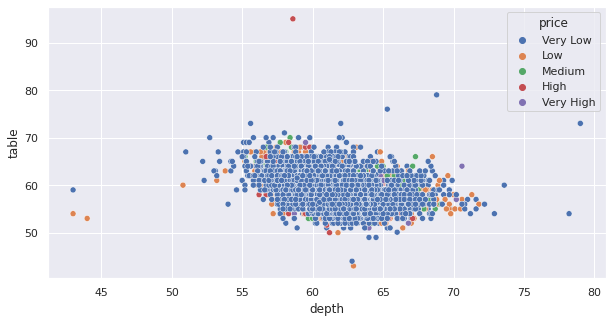

In [127]:
# 2D Scatter Plot
plt.rcParams['figure.figsize'] = (10.0, 5.0)
sns.scatterplot(x="depth", y="table", hue="price", data=data)

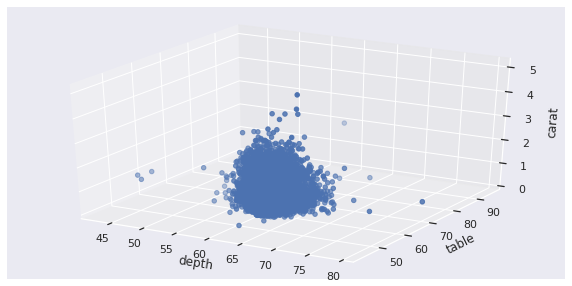

In [128]:
# 3D Scatter Plot

from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = data['depth']
y = data['table']
z = data['carat']

ax.set_xlabel("depth")
ax.set_ylabel("table")
ax.set_zlabel("carat")

ax.scatter(x, y, z)

plt.show()

In [ ]:
sns.pairplot(data, hue="price")

In [129]:
#Encoding the label
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
data["price"] = label_encoder.fit_transform(data["price"]) 
data.head()

,carat,depth,table,price,xyz,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,4,0.612863,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,4,0.597671,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4,0.568966,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4,0.623962,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4,0.632911,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [130]:
X = data.drop(['price'], axis = 1) # independent variable
y = data[['price']] #dependent variable

In [137]:
data.isna().sum()

carat            0
depth            0
table            0
price            0
xyz              0
cut_Fair         0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_D          0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_I1       0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
dtype: int64

In [132]:
data = data.apply(lambda x: x.fillna(x.median()), axis = 0)

In [145]:
np.any(np.isnan(data))
np.all(np.isfinite(data))

True

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# define outlier detection model
model = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1), max_features=6, random_state=42)
# fit
model.fit(X_train)

X_p = model.predict(X_train)
X_p_2 = model.predict(X_test)
# X_p_O = model.predict(outlier)
X_7 = model.decision_function(X)
X_8 = model.predict(X)



X['scores'] = X_7
X['anomaly'] = X_8
X.head()



anomaly=X.loc[X['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)
outlier_1 = anomaly.drop("scores", axis=1)
outlier = outlier_1.drop("anomaly", axis=1)
print(outlier)

X_p_O = model.predict(outlier)


X_df_drop_drop = X.drop(anomaly_index, axis=0)
y_1 = y.drop(anomaly_index, axis=0)
X_df_drop_drop_drop = X_df_drop_drop.drop("scores", axis=1)
X_1 = X_df_drop_drop_drop.drop("anomaly", axis=1)
X_1.info()
y_1.info()



print(outlier)
print(X_train)
y_pred_train = X_p
y_pred_test = X_p_2
y_pred_outlier = X_p_O

In [ ]:
sns.displot(X_1)

In [146]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
StandardScaler().fit_transform(X_1) # this is using for normalization

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split, cross_validate # train_test_split used also above.

#Scaling and outlier removed
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_1,y_1, test_size=0.3, random_state=42)

model_log = LogisticRegression(random_state=42, n_jobs=-1)
cv = cross_validate(model_log,X_train_log,y_train_log, cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test_log,y_test_log)))

Mean training accuracy: 0.8736727550810318
Test accuracy: 0.8718001509848329


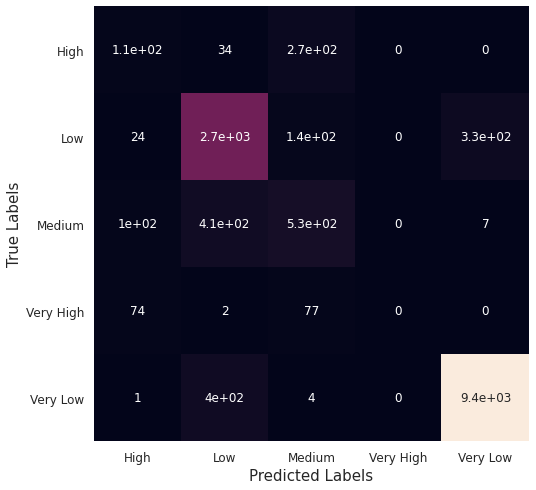

In [147]:
from sklearn.metrics import confusion_matrix

pred = cv["estimator"][0].predict(X_test_log)

cm = confusion_matrix(y_test_log, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)


#ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
#ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)

# If our y values have labels to represent the them into confusion matrix we use that instead of above.
# Checking encoded labels

categories = list(label_encoder.inverse_transform([0, 1, 2, 3, 4]))
categories
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)

ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [148]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_1, y_1, test_size=0.33, random_state=123)

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train_clf, y_train_clf)
print("Accuracy of train of classification:",clf.score(X_train_clf, y_train_clf))
print("Accuracy of test of classification:",clf.score(X_test_clf, y_test_clf))



# Bias for training = 1-Bias for training
# Bias for test = 1-Bias for test
# Variance = test bias - training bias

print("Bias for training: ", (1 - clf.score(X_train_clf, y_train_clf)))
print("Bias for test: ", (1 - clf.score(X_test_clf, y_test_clf)))
print("Variance: ", (1 - clf.score(X_train_clf, y_train_clf)) - (1 - clf.score(X_test_clf, y_test_clf)))

Accuracy of train of classification: 0.8750192065394425
Accuracy of test of classification: 0.8747270572088091
Bias for training:  0.12498079346055746
Bias for test:  0.12527294279119094
Variance:  -0.00029214933063348436


In [149]:
# Classification Report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test_clf)
print(classification_report(y_test_clf, pred))

              precision    recall  f1-score   support

           0       0.37      0.01      0.03       476
           1       0.77      0.82      0.80      3460
           2       0.50      0.62      0.56      1146
           3       0.66      0.34      0.45       179
           4       0.96      0.96      0.96     10768

    accuracy                           0.87     16029
   macro avg       0.65      0.55      0.56     16029
weighted avg       0.87      0.87      0.86     16029



In [150]:
# Metrics
print("Precision = {}".format(precision_score(y_test_clf, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test_clf, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test_clf, pred)))
print("F1 Score = {}".format(f1_score(y_test_clf, pred,average='macro')))

Precision = 0.6536305373858149
Recall = 0.5534838991928019
Accuracy = 0.8747270572088091
F1 Score = 0.5591338540645111
